In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import webrtcvad
import wave
import speech_recognition as sr           # package SpeechRecognition
import datetime
import strsimpy
import xml.etree.ElementTree as ET
import soundfile as sf
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os
from scipy import ndimage

Ouverture du csv des annotations  
changement des colonnes  
selection des audio notés, calcul de la moyenne  
chargement des fonctions  

In [2]:
%run audio_fonctions.ipynb
%run loading_data.ipynb

audio : 55
audio_only : 33


#### liste des fichiers audio annotés

In [3]:
ratedScenes = sorted(list(set(audio['doc'])))
print(ratedScenes[0:10])

['100_1', '107_7', '108_3', '116_15', '128_5', '129_5', '12_13', '13_2', '147_1', '148_4']


### Librairies : Pybk, webTRC, SNR, énergie, ZCR, MFCC
score de reconnaissance son texte avec le CMU sphinx  
nombre de locuteurs en tout (et en même temps)  
SNR  
ligth gradient boosting (si pb de corrélation)  
accent ?  
lium speaker diarization (java) -> nombre de locuteur, (~segmentation parole/non parole)  





# Make features

#### sur les audio annotés :

In [4]:
ratedScenes = sorted(list(set(audio_only['doc'])))
all_scenes  = sorted(list(set(annot['doc'])))

method, smooth = 'subtitles', 'closing'
filename = './data/'+method+'_'+smooth+'.csv'

pas = 5
rated_scenes_chunks = [ratedScenes[s:s+pas] for s in range(0,len(ratedScenes),pas)]
all_scenes_chunks   = [all_scenes[s:s+pas]  for s in range(0,len(all_scenes),pas)]

df_features = pd.DataFrame(columns=['SCENE','SR','SNR','CONF','RECON','SCORE','XML'])

In [5]:
df_features = pd.read_csv(filename, sep='§', engine='python', index_col=0, encoding='utf-8')

In [6]:
for scenes in rated_scenes_chunks:
    df_features = make_audio_features(scenes, df=df_features, method=method, smooth=smooth)
    df_features.to_csv(filename, sep='§', encoding='utf-8')
    print(len(df_features), "/", len(ratedScenes))

40 / 33
40 / 33
40 / 33
40 / 33
40 / 33
40 / 33
40 / 33


#### sur toutes les data :

In [7]:
#df_features = pd.read_csv(filename, sep='§', engine='python', index_col=0, encoding='utf-8')

In [9]:
for scenes in all_scenes_chunks:
    print(scenes)
    df_features = make_audio_features(scenes, df=df_features, method=method, smooth=smooth)
    df_features.to_csv(filename, sep='§', encoding='utf-8')
    print(len(df_features), "/", len(all_scenes))

['100_1', '101_7', '102_8', '103_13', '104_6']
40 / 300
['105_14', '106_2', '107_7', '108_3', '109_13']
40 / 300
['10_15', '110_2', '111_10', '112_8', '113_11']
10_15 0.1753623188405797
110_2 0.26141078838174275
111_10 0.6261682242990654
112_8 0.20335429769392033


ValueError: attempt to get argmin of an empty sequence

# Tests

#### SNR (crapy for now)

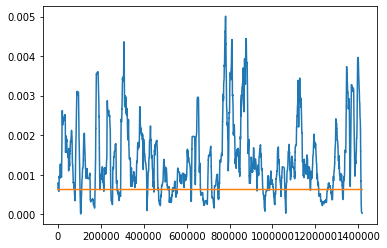

In [24]:
scene = '226_6'
file = dir_audio + scene + audio_extension
signal, fe = librosa.load(file, sr=samplerate, mono=True)

energy = (pd.Series(signal)**2).rolling(window=fe, min_periods=2, center=True).mean()

s = pd.Series(signal)
energy = (s**2).rolling(window=fe, min_periods=2, center=True).mean()
min_E = min(energy)
min_E = np.percentile(energy, 5)
plt.plot(energy)
f = 2
plt.plot([f * min_E] * len(energy))
plt.show()